>
>

# Financial Planning with APIs and Simulations

>
>

---

### In this series of simulations, I've created two financial analysis tools by using a single Jupyter notebook:

**Part 1:**: A financial planner for emergencies. 
- The members will be able to use this tool to visualize their current savings. 
- The members can then determine if they have enough reserves for an emergency fund.

**Part 2**: A financial planner for retirement. 
- This tool will forecast the performance of their retirement portfolio in 30 years. 
- To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.



## Run All Imports

In [2]:
# Import pandas for creating DataFrames
import pandas as pd

# Import Python Requests library for making API Calls
import requests

# Impost JSON library to be able to work with files in JSON format
import json

# Import pandas os module to be able to access information from an .env file
import os

# Import load_env from dotenv so able to load .env file into notebook
# If it doesnt import, open JupyterLab console command line and 
# pip install python-dotenv
from dotenv import load_dotenv

# Import alpaca_trade_api library for using SDKs
# If it doesnt import, open JupyterLab console command line and 
# pip install alpaca_trade_api
import alpaca_trade_api as tradeapi

# Import the MCSimulation module from the MCForecastTools library file 
# to run a Monte Carlo Simulation
from MCForecastTools import MCSimulation

# Import matplotlib inline dependency for generating graphics
%matplotlib inline

In [3]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

---

# Part 1: Create a Financial Planner for Emergencies

---

# Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, I’ll determine the current value of a member’s cryptocurrency wallet. I’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, I’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



### Define the number of coins held in the member's portfolio

In [13]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [5]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [6]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [7]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 18941706,
            "id": 1,
            "last_updated": 1643332749,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 704719903303,
                    "percent_change_1h": -0.392401578285607,
                    "percent_change_24h": 0.695201461862158,
                    "percent_change_7d": -8.62840496390322,
                    "percentage_change_1h": -0.392401578285607,
                    "percentage_change_24h": 0.695201461862158,
                    "percentage_change_7d": -8.62840496390322,
                    "price": 37195.0,
                    "volume_24h": 21619058129
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18941706,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

In [8]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 119339797,
            "id": 1027,
            "last_updated": 1643333006,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 290383352151,
                    "percent_change_1h": 0.108135190607938,
                    "percent_change_24h": -1.01614230491415,
                    "percent_change_7d": -19.3644949419185,
                    "percentage_change_1h": 0.108135190607938,
                    "percentage_change_24h": -1.01614230491415,
                    "percentage_change_7d": -19.3644949419185,
                    "price": 2431.64,
                    "volume_24h": 16123786856
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119339797,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurr

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [10]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f"The price for Bitcoin is ${btc_price}")


The price for Bitcoin is $37195.0


In [11]:
# Navigate the ETH response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f"The price for Ethereum is ${eth_price}")


The price for Ethereum is $2431.64


#### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [15]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
print(f'The current value of the Bitcoin holding is {btc_value}')


The current value of the Bitcoin holding is 44634.0


In [16]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
print(f'The current value of the Ethereum holding is {eth_value}')


The current value of the Ethereum holding is 12887.692


In [30]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f'The current value of the entire cryptocurrency wallet is {total_crypto_wallet}')


The current value of the entire cryptocurrency wallet is 57521.691999999995


---

### This concludes the **Evaluate the Cryptocurrency Wallet by Using the Requests Library Tool** section of code.

---

---

---

# Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, I’ll determine the current value of a member’s stock and bond holdings. I’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. 

To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Input the total number of shares held in the portfolio. This one contains (SPY) and (AGG).

In [18]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


# Step 1: In the root folder, use the environment file (`SAMPLE.env`) to store the values of the Alpaca API key and Alpaca secret key.
### **Notes for making the request to Alpaca:** 
- Do not use parentheses or any special characters in the key value
- Make sure that ('SAMPLE.env') is adjacent to the Jupyter Notebook ('financial_planning_tools.ipyn')
- After the keys are inputted, save the ('SAMPLE.env') file as ('.env') with no text before the period.
- Keep the API keys secure and do not accidentally upload them to the internet.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [6]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object using Alpaca's tradeapi.REST function.
# Pass it through the two keys.
# Specify the version parameter.
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


### Verify that the API keys have been read
If access from your machine to Alpaca has been granted, the API key variables should display as two string **str** object types

In [5]:
# Verify that you have the API keys
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [20]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY', 'AGG']

# Set timeframe to 1D 
timeframe = '1D'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2022-01-26", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-26", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [21]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Review the first 5 rows of the Alpaca DataFrame
df_portfolio.head()


C:\Users\laria\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:7: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead
  import sys


AGG                                       SPY  \
                             open    high     low   close    volume    open   
time                                                                          
2022-01-26 00:00:00-05:00  112.06  112.13  111.36  111.36  10170465  440.72   

                                                              
                             high     low   close     volume  
time                                                          
2022-01-26 00:00:00-05:00  444.04  428.86  433.45  174214548

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [22]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = df_portfolio["AGG"]["close"]

# Print the AGG closing price
agg_close_price


time
2022-01-26 00:00:00-05:00    111.36
Name: close, dtype: float64

In [23]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = df_portfolio["SPY"]["close"]

# Print the SPY closing price
spy_close_price


time
2022-01-26 00:00:00-05:00    433.45
Name: close, dtype: float64

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [27]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
print(f'The current value of the iShares Core US Aggregate Bond ETF holding is {agg_value}')


The current value of the iShares Core US Aggregate Bond ETF holding is time
2022-01-26 00:00:00-05:00    22272.0
Name: close, dtype: float64


In [28]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares
# Print the current value of the stock portfolio
print(f'The current value of the SPDR S&P 500 ETF Trust holding is {spy_value}')


The current value of the SPDR S&P 500 ETF Trust holding is time
2022-01-26 00:00:00-05:00    47679.5
Name: close, dtype: float64


In [87]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = float(agg_value + spy_value)

# Print the current balance of the stock and bond portion of the portfolio
print(f'The current balance of the stock and bond portion of the portfolio is {total_stocks_bonds}')

The current balance of the stock and bond portion of the portfolio is 69951.5


In [70]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = float(total_stocks_bonds + total_crypto_wallet)

# Print current cryptocurrency wallet balance
print(f'The current balance of the entire investment portfolio is {total_portfolio}')


The current balance of the entire investment portfolio is 127473.192


---

### This concludes the **Evaluate the Stock and Bond Holdings by Using the Alpaca SDK** section of code

---

---

---

# Evaluate the Emergency Fund

In this section, I’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. 

To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [38]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data
    

[57521.691999999995,
 time
 2022-01-26 00:00:00-05:00    69951.5
 Name: close, dtype: float64]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [47]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(
    {'Value':[round(float(total_crypto_wallet)), round(float(total_stocks_bonds))]},
    index=['Cryptocurrency', 'Stocks and Bonds'])


# Display the savings_df DataFrame
savings_df


,Value
Cryptocurrency,57522
Stocks and Bonds,69952


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Total Value of Member Portfolio'}, ylabel='Value'>

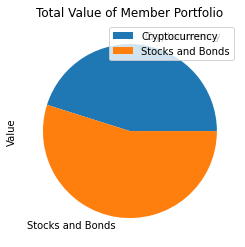

In [50]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y ='Value', title='Total Value of Member Portfolio')


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [73]:
# Create a variable named emergency_fund_value
emergency_fund_value = float(3 * monthly_income)

# Create a variable for hthe difference of total investment portfolio minus an emregency portfolio
difference_fund_value = float(emergency_fund_value - total_portfolio)


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [74]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print("Congratulations, you have enough money in your investment portfolio to fund an emergency portfolio.")
    
elif total_portfolio == emergency_fund_value:
        print("Your investment portfolio equals your emergency portfolio. Congratulations on meeting this important financial goal.")
        
elif total_portfolio < emergency_fund-value:
    print(f"You are ${difference_fund_value} away from having enough money in your investment portfolio to fund an emergency portfolio.")
    


Congratulations, you have enough money in your investment portfolio to fund an emergency portfolio.


---

### This concludes the **Evaluate the Emergency Fund** section of code

## This also concludes Part 1: **Create a Financial Planner for Emergencies**

---

---

# Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, I’ll use the MCForecastTools libr!ary to create a Monte Carlo simulation for the member’s savings portfolio. 

To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [133]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date_mc = pd.Timestamp("2019-01-27", tz="America/New_York").isoformat()
end_date_mc = pd.Timestamp("2022-01-27", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows_mc = 1000

# Set the tickers for the new simulation
tickers_mc = ['SPY', 'AGG']

# Set the timeframe to 3 years for the simulation
timeframe_mc = '1D'

In [137]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
prices_df_mc = alpaca.get_barset(
  tickers_mc,
  timeframe_mc,
  start=start_date_mc,
  end=end_date_mc,
  limit=limit_rows_mc
).df


# Display both the first and last five rows of the DataFrame
display(prices_df_mc.head())
display(prices_df_mc.tail())


C:\Users\laria\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:10: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead
  # Remove the CWD from sys.path while we load stuff.


AGG                                          \
                             open     high      low     close      volume   
time                                                                        
2019-01-28 00:00:00-05:00  106.62  106.745  106.580  106.6550   6372589.0   
2019-01-29 00:00:00-05:00  106.73  106.910  106.685  106.9063   5399892.0   
2019-01-30 00:00:00-05:00  106.79  107.140  106.790  107.1400   4948983.0   
2019-01-31 00:00:00-05:00  107.30  107.530  107.290  107.4600  11394113.0   
2019-02-01 00:00:00-05:00  107.09  107.150  106.880  106.9600   5325410.0   

                              SPY                                      
                             open    high     low     close    volume  
time                                                                   
2019-01-28 00:00:00-05:00  263.39  263.82  261.79  263.6350  75207990  
2019-01-29 00:00:00-05:00  263.92  264.55  262.48  263.3100  54249161  
2019-01-30 00:00:00-05:00  265.10  268.52  264.25  267.4625  75091893  
2019-01-31 00:00:00-05:00  267.51  270.47  267.27  270.2325  73699733  
2019-02-01 00:00:00-05:00  270.15  271.20  269.18  270.0700  68194167

AGG                                      \
                               open    high     low   close      volume   
time                                                                      
2022-01-21 00:00:00-05:00  112.1900  112.35  112.11  112.24   7792653.0   
2022-01-24 00:00:00-05:00  112.3814  112.42  112.10  112.12  10666672.0   
2022-01-25 00:00:00-05:00  112.1800  112.30  111.96  112.00   9392367.0   
2022-01-26 00:00:00-05:00  112.0600  112.13  111.36  111.36  10170465.0   
2022-01-27 00:00:00-05:00  111.6200  111.88  111.62  111.72   5836124.0   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2022-01-21 00:00:00-05:00  445.56  448.06  437.97  438.11  174541929  
2022-01-24 00:00:00-05:00  432.03  440.38  420.76  439.88  233026938  
2022-01-25 00:00:00-05:00  433.06  439.72  364.68  434.51  148023735  
2022-01-26 00:00:00-05:00  440.72  444.04  428.86  433.45  174214548  
2022-01-27 00:00:00-05:00  438.26  441.58  429.45  431.27  136251597

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [138]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_30_year = MCSimulation(
  portfolio_data = prices_df_mc,
  weights = [.60,.40],
  num_simulation = 500,
  num_trading_days = 252*30)

# Review the simulation input data
MC_30_year.portfolio_data.head()

AGG                                          \
                             open     high      low     close      volume   
time                                                                        
2019-01-28 00:00:00-05:00  106.62  106.745  106.580  106.6550   6372589.0   
2019-01-29 00:00:00-05:00  106.73  106.910  106.685  106.9063   5399892.0   
2019-01-30 00:00:00-05:00  106.79  107.140  106.790  107.1400   4948983.0   
2019-01-31 00:00:00-05:00  107.30  107.530  107.290  107.4600  11394113.0   
2019-02-01 00:00:00-05:00  107.09  107.150  106.880  106.9600   5325410.0   

                                           SPY                            \
                          daily_return    open    high     low     close   
time                                                                       
2019-01-28 00:00:00-05:00          NaN  263.39  263.82  261.79  263.6350   
2019-01-29 00:00:00-05:00     0.002356  263.92  264.55  262.48  263.3100   
2019-01-30 00:00:00-05:00     0.002186  265.10  268.52  264.25  267.4625   
2019-01-31 00:00:00-05:00     0.002987  267.51  270.47  267.27  270.2325   
2019-02-01 00:00:00-05:00    -0.004653  270.15  271.20  269.18  270.0700   

                                                  
                             volume daily_return  
time                                              
2019-01-28 00:00:00-05:00  75207990          NaN  
2019-01-29 00:00:00-05:00  54249161    -0.001233  
2019-01-30 00:00:00-05:00  75091893     0.015770  
2019-01-31 00:00:00-05:00  73699733     0.010357  
2019-02-01 00:00:00-05:00  68194167    -0.000601

In [139]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\laria\OneDrive\Documents\SCHOOL\Fintech Bootcamp\Modules\Module 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005750,0.995635,1.007022,0.987412,0.999500,1.003253,1.001813,1.001711,1.004139,1.008872,...,1.006422,0.992341,1.003040,1.003893,0.999947,1.002749,1.000583,1.013705,0.994746,0.989013
2,1.002516,0.986068,0.994909,0.992803,0.988213,1.005219,0.994421,0.992605,1.010433,1.013710,...,1.009613,0.993655,0.998943,1.009609,0.999655,1.001194,1.003646,1.027345,0.986668,0.990098
3,0.995637,0.982947,0.991192,0.990943,0.981541,1.003367,0.995401,0.986067,1.006093,1.021883,...,1.010457,0.993451,0.996657,1.016517,0.998620,1.005153,1.002699,1.020121,0.994445,0.987834
4,0.989945,0.981421,1.009935,0.993528,0.984287,1.006012,0.999584,0.987894,1.010095,1.025212,...,1.004911,0.988711,1.002580,1.014700,0.989932,1.005663,1.006328,1.023694,0.992689,0.988618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.181781,13.764453,17.964255,11.664323,5.028379,8.724283,10.426140,6.074919,17.589691,8.892982,...,11.383651,25.966373,36.869396,12.918873,13.887529,8.302976,18.571402,32.496971,14.293822,7.860622
7557,13.270345,13.670279,17.982336,11.772163,5.022588,8.681009,10.413040,6.092353,17.573964,8.939742,...,11.393111,25.846751,37.081776,13.068683,13.933003,8.251462,18.257804,32.379886,14.448727,7.853940
7558,13.335419,13.632359,17.944649,11.728909,4.984102,8.676083,10.392981,6.133407,17.704027,8.870028,...,11.383182,25.995964,36.853665,13.217873,13.768482,8.176610,18.236557,32.329274,14.395703,7.830279
7559,13.314193,13.627300,18.029036,11.788263,4.973872,8.714741,10.304478,6.124859,17.671122,8.848666,...,11.316506,25.924907,37.322887,13.251408,13.933314,8.219761,18.384590,32.387630,14.348492,7.831981


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

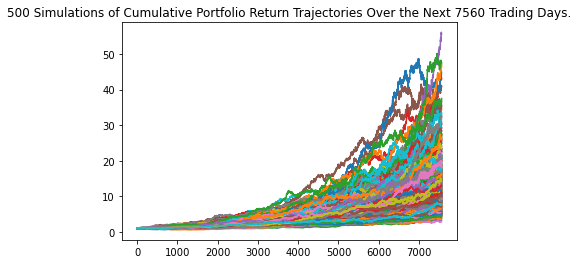

In [140]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_30_year.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

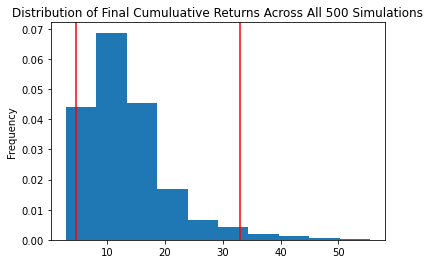

In [141]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_30_year.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [142]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_30_year_summary_statistics = MC_30_year.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
display(MC_30_year_summary_statistics)

count           500.000000
mean             13.352730
std               7.387814
min               2.865067
25%               8.325455
50%              11.650717
75%              16.346354
max              55.489498
95% CI Lower      4.568729
95% CI Upper     33.014408
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [143]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f'The current balance of the stock and bond portion of the members portfolio is {total_stocks_bonds}')


The current balance of the stock and bond portion of the members portfolio is 69951.5


In [149]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_30_year_summary_statistics[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = MC_30_year_summary_statistics[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that the current investment of {total_stocks_bonds} in the stocks and bonds portion of the portfolio"
  f" over the next 30 years will end within in the range of"
  f" ${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}.")


There is a 95% chance that the current investment of 69951.5 in the stocks and bonds portion of the portfolio over the next 30 years will end within in the range of $ 319589.45 and $ 2309407.38.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with my work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, my next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, I'll do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [150]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_10_year = MCSimulation(
  portfolio_data = prices_df_mc,
  weights = [.80,.20],
  num_simulation = 500,
  num_trading_days = 252*10)

# Review the simulation input data
MC_10_year.portfolio_data.head()


AGG                                          \
                             open     high      low     close      volume   
time                                                                        
2019-01-28 00:00:00-05:00  106.62  106.745  106.580  106.6550   6372589.0   
2019-01-29 00:00:00-05:00  106.73  106.910  106.685  106.9063   5399892.0   
2019-01-30 00:00:00-05:00  106.79  107.140  106.790  107.1400   4948983.0   
2019-01-31 00:00:00-05:00  107.30  107.530  107.290  107.4600  11394113.0   
2019-02-01 00:00:00-05:00  107.09  107.150  106.880  106.9600   5325410.0   

                                           SPY                            \
                          daily_return    open    high     low     close   
time                                                                       
2019-01-28 00:00:00-05:00          NaN  263.39  263.82  261.79  263.6350   
2019-01-29 00:00:00-05:00     0.002356  263.92  264.55  262.48  263.3100   
2019-01-30 00:00:00-05:00     0.002186  265.10  268.52  264.25  267.4625   
2019-01-31 00:00:00-05:00     0.002987  267.51  270.47  267.27  270.2325   
2019-02-01 00:00:00-05:00    -0.004653  270.15  271.20  269.18  270.0700   

                                                  
                             volume daily_return  
time                                              
2019-01-28 00:00:00-05:00  75207990          NaN  
2019-01-29 00:00:00-05:00  54249161    -0.001233  
2019-01-30 00:00:00-05:00  75091893     0.015770  
2019-01-31 00:00:00-05:00  73699733     0.010357  
2019-02-01 00:00:00-05:00  68194167    -0.000601

In [151]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\laria\OneDrive\Documents\SCHOOL\Fintech Bootcamp\Modules\Module 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993236,0.999597,1.001482,0.994909,1.004306,1.000259,1.014108,0.998441,0.997827,1.006216,...,0.992801,0.996628,0.999834,0.995254,0.998345,0.996984,0.993030,1.000144,1.005388,0.998901
2,0.998218,1.006248,1.005839,0.993442,1.000714,1.007064,1.011190,0.992088,0.997535,1.003300,...,0.992350,0.991618,0.995566,0.993781,1.004754,0.988235,0.995370,1.001790,1.002691,1.006789
3,0.998889,1.010617,1.006943,0.995139,1.004052,1.007825,1.013486,0.985142,0.995781,1.006942,...,0.995401,0.990128,0.996035,0.997792,1.002770,0.997174,0.997538,1.002726,1.002430,1.012163
4,1.001790,1.007708,1.009616,0.992447,1.013015,1.006980,1.013761,0.989237,0.995664,1.005186,...,0.997930,0.991999,0.993817,1.000465,1.006429,0.998184,0.991659,1.007233,0.998992,1.009972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.720475,1.518540,1.635265,1.831528,1.947700,1.741684,1.140760,1.363356,1.522189,1.452252,...,1.460228,1.708129,1.231318,2.331665,1.535576,1.170921,1.956021,1.370291,2.066674,1.189381
2517,1.716483,1.517000,1.634989,1.847941,1.962333,1.732496,1.145917,1.357161,1.523320,1.446072,...,1.465818,1.711328,1.240657,2.347862,1.540868,1.184658,1.940212,1.373252,2.070309,1.180413
2518,1.727483,1.523150,1.615971,1.841219,1.960978,1.726135,1.137411,1.369804,1.530075,1.450200,...,1.466099,1.713991,1.238854,2.353135,1.538941,1.191624,1.941216,1.385929,2.065423,1.180682
2519,1.723326,1.526430,1.611319,1.846098,1.960568,1.722724,1.136281,1.373219,1.525362,1.445983,...,1.464535,1.725309,1.238475,2.332103,1.544836,1.192465,1.945178,1.391287,2.071911,1.179483


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

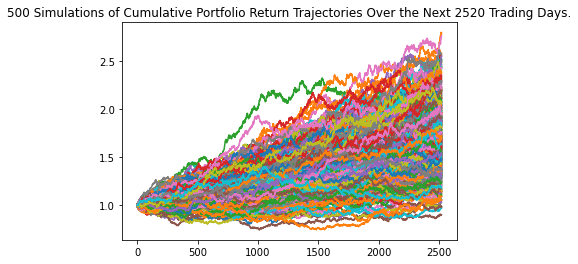

In [152]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_10_year.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

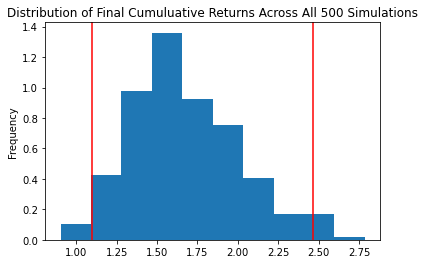

In [153]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_10_year.plot_distribution()


In [155]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_10_year_summary_statistics = MC_10_year.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
print(MC_10_year_summary_statistics)

count           500.000000
mean              1.670387
std               0.337976
min               0.903250
25%               1.437009
50%               1.628749
75%               1.884880
max               2.785411
95% CI Lower      1.096090
95% CI Upper      2.462238
Name: 2520, dtype: float64


---

### This concludes the **Create the Monte Carlo Simulation** portion of code

## This also concludes Part 2: Create a Financial Planner for Retirement

---

---

# To check for understanding, answer the following questions:

---

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [156]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f'The current balance of the stock and bond portion of the members portfolio is {total_stocks_bonds}')


The current balance of the stock and bond portion of the members portfolio is 69951.5


In [157]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC_10_year_summary_statistics[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = MC_10_year_summary_statistics[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that the current investment of {total_stocks_bonds} in the stocks and bonds portion of the portfolio"
  f" over the next 10 years will end within in the range of"
  f" ${ci_lower_ten_cumulative_return: .2f} and ${ci_upper_ten_cumulative_return: .2f}.")



There is a 95% chance that the current investment of 69951.5 in the stocks and bonds portion of the portfolio over the next 10 years will end within in the range of $ 76673.12 and $ 172237.27.


---

#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

**Answer** No. The members will not enough money to fund their retirement in 10 years. Even the upper bound of the confidence interval does not reach 401k. The better investment portfolio is a conservative 30 year portfolio.